# Problem Descriptions

#### Problem Statement - Based on the emails received, build multiple models and chose best model to predict the new email is spam or normal email.

Given dataset having 3 features

subject - Subject of the messages

message - actual full messages

label - Whether the arrived message is spam or not

In [1]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('wordnet')
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import numpy as np

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PREETI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PREETI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\PREETI\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PREETI\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#### 1. Reading the Data

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/arjun0200/Datasets/main/messages.csv")

In [4]:
pd.set_option("display.max_rows", None)
df.sample(10)

,subject,message,label
378,computer - mediated conversation,= = = = = = = = = = = = = = = = = = = = = = = ...,0
2511,conference program ( ling . symp . & math . li...,xxviii linguistic symposium on romance languag...,0
857,aspects of bilingualism in the ancient world,aspects of bilingualism in the ancient world t...,0
1270,NaN,need a photomask ? search no further . . . adt...,1
1540,semitic langs - - coling-acl ' 98,workshop on computational approaches to semiti...,0
1731,ecai-98 : final cfp and pre-conference programme,ecai ' 98 august 23-28 1998 brighton uk the de...,0
1528,disc : evolution analytic > synthetic,"as far as i can tell , melanie misanchuk 's qu...",0
936,syllabus for an undergraduate socio-linguistic...,i am putting together a syllabus for an underg...,0
2846,haskins laboratories world wide web site,= = = = = = = = = = = = = = = = = = = = = = = ...,0
1347,"review any book , pc or mac software pgm , con...",we are celebrating our 50th issue of our inet ...,1


In [5]:
df['label'].value_counts()

0    2412
1     481
Name: label, dtype: int64

We observe that the dataset is unbalanced

### 2. Data Cleaning

2.1 Checking for Duplicates and Droping them

In [6]:
df.duplicated().sum()

17

There are 17 duplicated rows in the dataset

In [7]:
#dropping duplicate rows in the dataset
df.drop_duplicates(inplace = True)

In [8]:
#checking the duplicate values again after dropping
df.duplicated().sum()

0

2.2 Checking missing values

In [9]:
df.isnull().sum()

subject    62
message     0
label       0
dtype: int64

In [10]:
df.isnull().sum()/len(df)*100

subject    2.155772
message    0.000000
label      0.000000
dtype: float64

We can observe that there are 2.15 percent values are missing. As there are many rows, we shouldn't drop all the rows. As subject is a 
categorical feature we create a new category (missing) for subject.

In [11]:
df['subject'].fillna("missing", inplace = True)

In [12]:
df.isnull().sum() #checking again null values after filling Nan values

subject    0
message    0
label      0
dtype: int64

### 3. Data Preprocessing

In [13]:
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"’", "'", phrase)
    phrase = re.sub(r"“", """, phrase)
    phrase = re.sub(r"“", """, phrase)
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    
    return phrase


In [14]:
stop_words = stopwords.words("english")
lemmatizer = WordNetLemmatizer()

#### 3.1 Subject

In [20]:
from tqdm import tqdm
preprocessed_subject = []

#tqdm is for printing the status bar
for sentence in tqdm(df['subject'].values):
    sentence = decontracted(sentence)
    sentence = re.sub(r'^https?:\/\/.*[\r\n]*', '', sentence) # remove hyperlinks
    sentence = re.sub('[^A-Za-z0-9]+', ' ', sentence) # removing special characters
    sentence = ''.join([i for i in sentence if not i.isdigit()]) # removing numbers
    sentence = ' '.join(e for e in sentence.split() if e not in stop_words) # removing stop words
    sentence = ' '.join(lemmatizer.lemmatize(e) for e in sentence.split()) # Lemmatization
    preprocessed_subject.append(sentence.lower().strip())

100%|████████████████████████████████████████████████████████████████████████████| 2876/2876 [00:00<00:00, 6760.85it/s]


In [21]:
df['subject'] = preprocessed_subject

#### 3.2 Message

In [25]:
from tqdm import tqdm
preprocessed_message = []

#tqdm is for printing the status bar
for sentence in tqdm(df['message'].values):
    sentence = decontracted(sentence)
    sentence = re.sub(r'^https?:\/\/.*[\r\n]*', '', sentence) # remove hyperlinks
    sentence = re.sub('[^A-Za-z0-9]+', ' ', sentence) # removing special characters
    sentence = ''.join([i for i in sentence if not i.isdigit()]) # removing numbers
    sentence = ' '.join(e for e in sentence.split() if e not in stop_words) # removing stop words
    sentence = ' '.join(lemmatizer.lemmatize(e) for e in sentence.split()) # Lemmatization
    preprocessed_message.append(sentence.lower().strip())

100%|█████████████████████████████████████████████████████████████████████████████| 2876/2876 [00:20<00:00, 140.67it/s]


In [26]:
df['message'] = preprocessed_message

In [27]:
df.head(50)

,subject,message,label
0,job posting apple research center,content length apple research center u million...,0
1,missing,lang classification grime joseph e barbara f g...,0
2,query letter frequency text identification,posting inquiry sergei atamas satamas umabnet ...,0
3,risk,colleague researching differing degree risk pe...,0
4,request book information,earlier morning phone friend mine living south...,0
5,call abstract optimality syntactic theory,content length call paper best good enough wor...,0
6,scandinavian linguistics,scandinavian linguistics university tromsoe co...,0
7,call paper linguistics session mla,call paper linguistics session midwest modern ...,0
8,foreign language commercial,content length greeting wondering someone iden...,0
9,fulbright announcement please post disseminate...,fulbright announcement please post disseminate...,0


## 4. EDA

In [28]:
df.subject.str.len().sum()

70597

#### Subject character lengths

<AxesSubplot:xlabel='subject', ylabel='Density'>

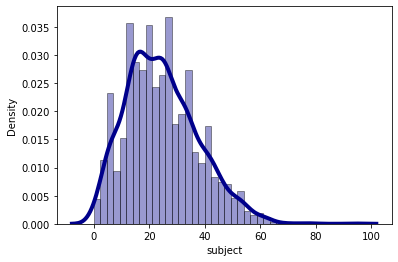

In [29]:
#Density plot and histogram of all character count

sns.distplot(df.subject.str.len(), hist=True,kde=True,
              bins= 40,color='darkblue',
              hist_kws={'edgecolor':'black'},
              kde_kws={'linewidth':4})

#### Messages character lengths

<AxesSubplot:xlabel='message', ylabel='Density'>

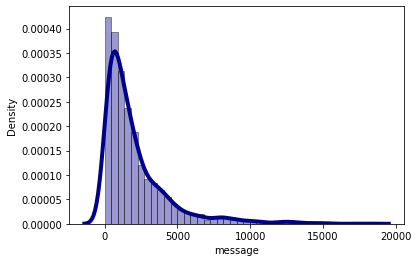

In [30]:
#Density plot and histogram of all character count

sns.distplot(df.message.str.len(), hist=True,kde=True,
              bins= 40,color='darkblue',
              hist_kws={'edgecolor':'black'},
              kde_kws={'linewidth':4})

Observations:- 

   - Most of the subject ranges are lies in the range of 0 to 60 characters with highest peak characters values of a subject are 20.
   
   - Most of the messages ranges are lies in the range of 0 to 6000 characters with highest peak characters values of a messages are 1000.

### Average words in features

#### Subject average length of words

<AxesSubplot:xlabel='subject', ylabel='Density'>

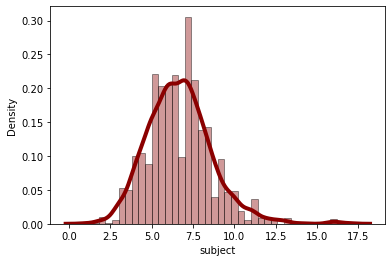

In [31]:
def avg_word(sentence):
    words=sentence.split()
    if len(words) == 0:
        pass
    else:
        return(sum(len(word) for word in words)/len(words))
    
#Density plot and histogram of average word length
sns.distplot(df['subject'].apply(lambda x: avg_word(x)), 
             hist=True, kde=True,
              bins = 40 ,color='darkred',
              hist_kws={'edgecolor':'black'},
              kde_kws={'linewidth':4})

#### Message average length of words

<AxesSubplot:xlabel='message', ylabel='Density'>

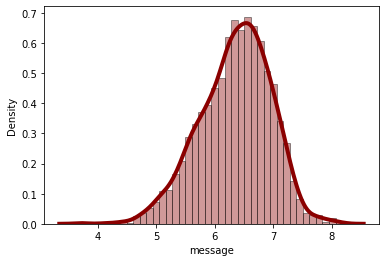

In [32]:
def avg_word(sentence):
    words=sentence.split()
    if len(words) == 0:
        pass
    else:
        return(sum(len(word) for word in words)/len(words))
    
#Density plot and histogram of average word length
sns.distplot(df['message'].apply(lambda x: avg_word(x)), 
             hist=True, kde=True,
              bins = 40 ,color='darkred',
              hist_kws={'edgecolor':'black'},
              kde_kws={'linewidth':4})

Observations:- 

   - Most of the subject ranges average length are lies in the range of 2 to 12 characters.

   - Most of the messages ranges average length are lies in the range of 4 to 8 characters.

### Checking 30 most occuring words in subject feature

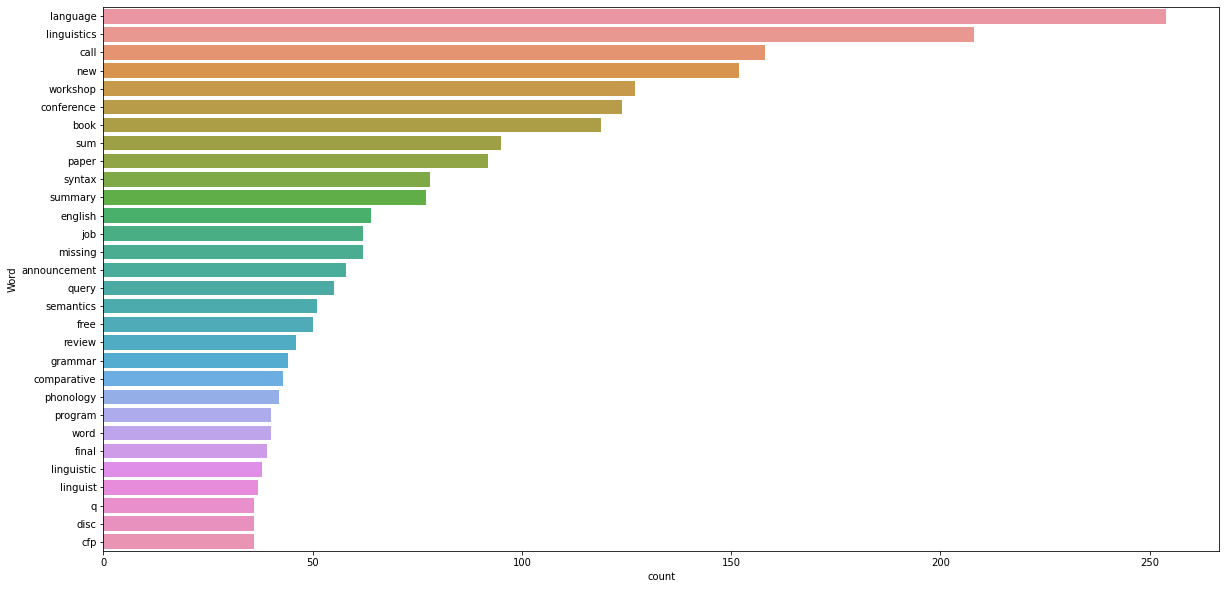

None


In [33]:
from nltk import FreqDist

def freq_words(x,terms=30):
    all_words=' '.join([text for text in x])
    all_words=all_words.split()
    
    fdist=FreqDist(all_words)
    words_df=pd.DataFrame({'word':list(fdist.keys()),'count':list(fdist.values())})
    
    #selecting top 30 frequent words
    d=words_df.nlargest(columns='count',n=terms)
    plt.figure(figsize=(20,10))
    ax=sns.barplot(data=d,x='count',y='word')
    ax.set(ylabel='Word')
    plt.show()
    

print(freq_words(df['subject']))

### Checking 30 most occuring words in message feature

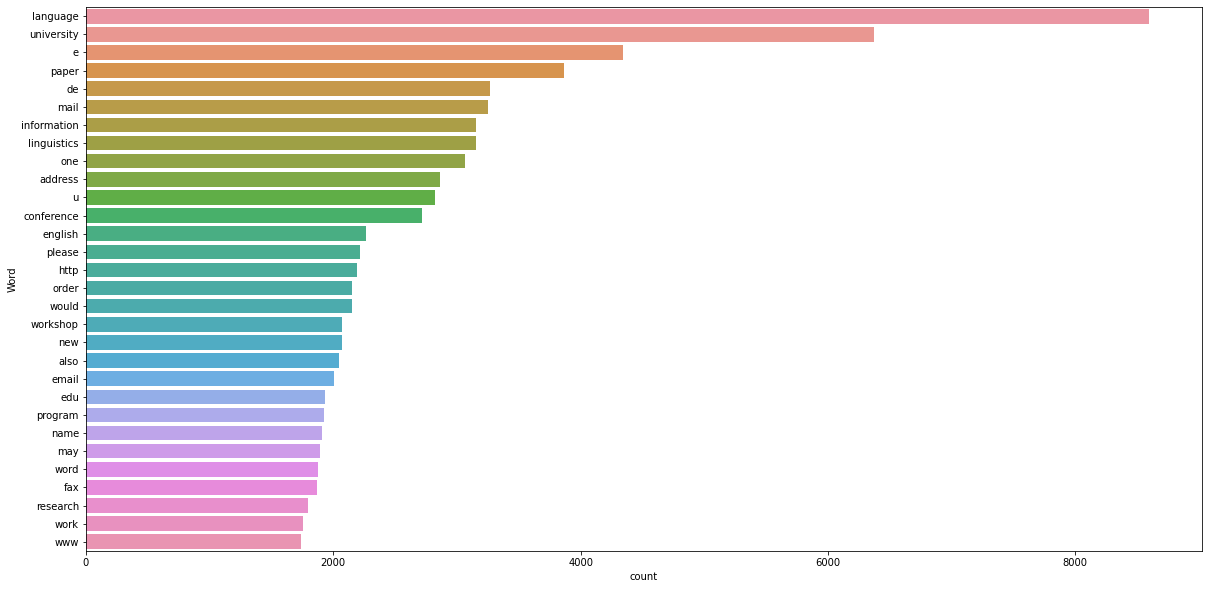

None


In [34]:
from nltk import FreqDist

def freq_words(x,terms=30):
    all_words=' '.join([text for text in x])
    all_words=all_words.split()
    
    fdist=FreqDist(all_words)
    words_df=pd.DataFrame({'word':list(fdist.keys()),'count':list(fdist.values())})
    
    #selecting top 30 frequent words
    d=words_df.nlargest(columns='count',n=terms)
    plt.figure(figsize=(20,10))
    ax=sns.barplot(data=d,x='count',y='word')
    ax.set(ylabel='Word')
    plt.show()
    

print(freq_words(df['message']))

### Checking 30 least occuring words in subject feature

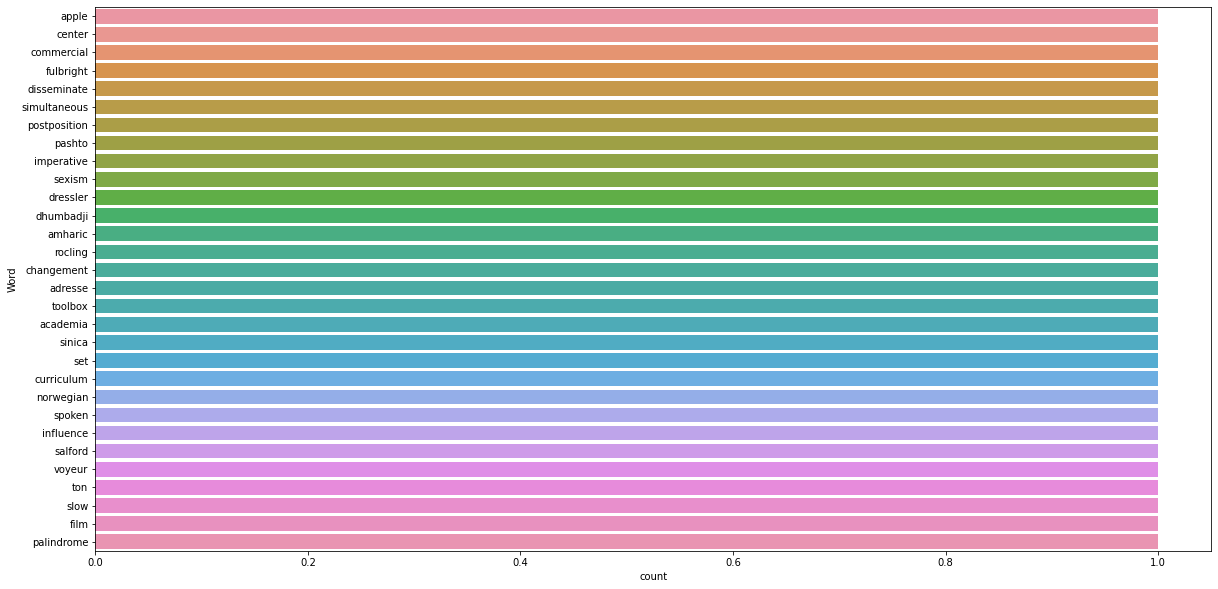

None


In [35]:
from nltk import FreqDist

def freq_words(x,terms=30):
    all_words=' '.join([text for text in x])
    all_words=all_words.split()
    
    fdist=FreqDist(all_words)
    words_df=pd.DataFrame({'word':list(fdist.keys()),'count':list(fdist.values())})
    
    #selecting top 30 frequent words
    d=words_df.nsmallest(columns='count',n=terms)
    plt.figure(figsize=(20,10))
    ax=sns.barplot(data=d,x='count',y='word')
    ax.set(ylabel='Word')
    plt.show()
    

print(freq_words(df['subject']))

### Checking 30 least occuring words in message feature

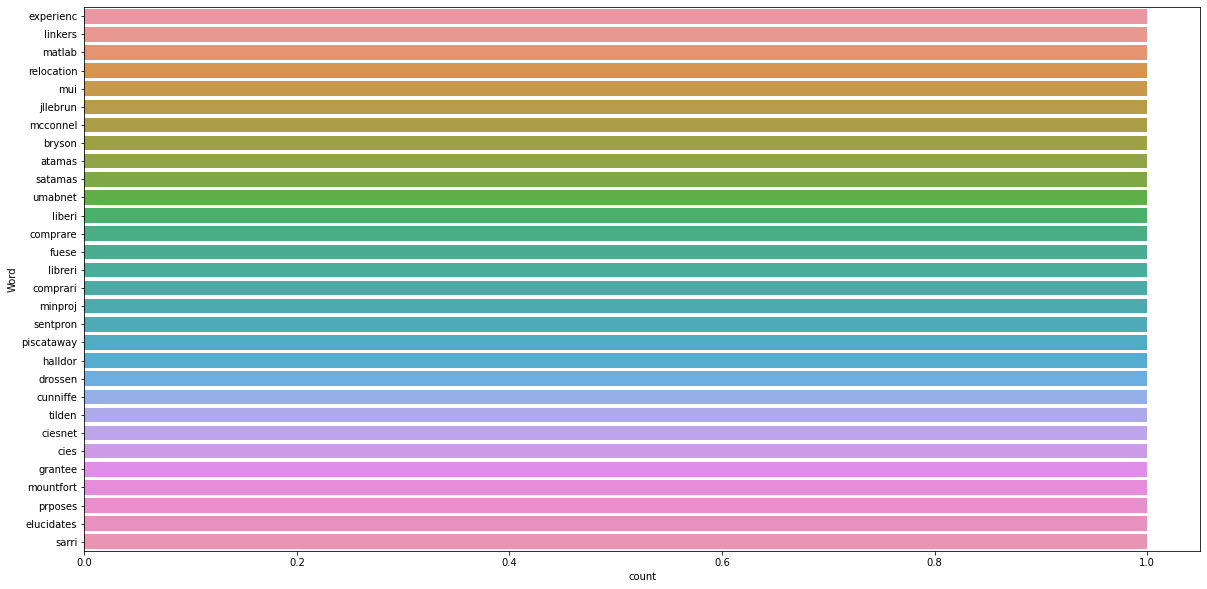

None


In [36]:
from nltk import FreqDist

def freq_words(x,terms=30):
    all_words=' '.join([text for text in x])
    all_words=all_words.split()
    
    fdist=FreqDist(all_words)
    words_df=pd.DataFrame({'word':list(fdist.keys()),'count':list(fdist.values())})
    
    #selecting top 30 frequent words
    d=words_df.nsmallest(columns='count',n=terms)
    plt.figure(figsize=(20,10))
    ax=sns.barplot(data=d,x='count',y='word')
    ax.set(ylabel='Word')
    plt.show()
    

print(freq_words(df['message']))

In [37]:
from wordcloud import WordCloud, STOPWORDS 
stopwords= set(STOPWORDS) 

def show_wordcloud(data, title =None): 
    wordcloud = WordCloud(background_color='white',
                          stopwords=stopwords,
                          max_words=300,
                          max_font_size=40,
                          scale=3, random_state=1).generate(str(data))
                                                                                                                                        
    fig= plt.figure(1,figsize=(15,15)) 
    plt.axis('off')
    if title:
        fig.suptitle(title,fontsize=20)
        fig.subplots_adjust(top=2.3)
        
    plt.imshow(wordcloud)
    plt.show()

Word cloud for Preprocessed_subjects


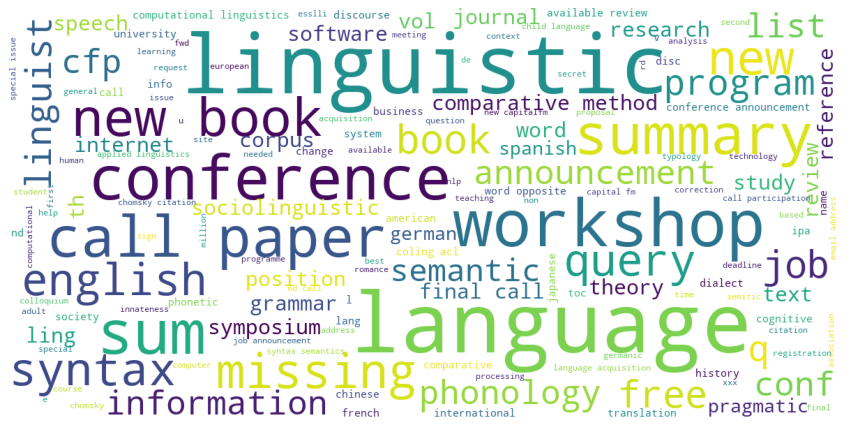

None


In [38]:
#creating wordcloud 
print("Word cloud for Preprocessed_subjects")
print(show_wordcloud(df['subject']))


Word cloud for Preprocessed_messages


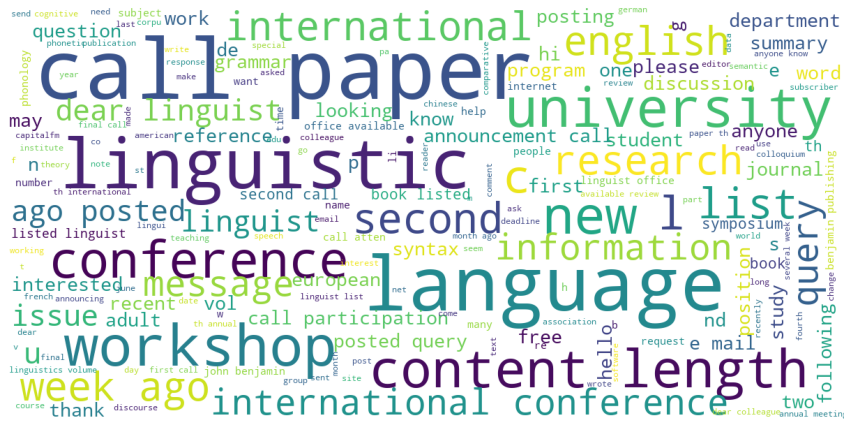

None


In [39]:
#creating wordcloud 
print("Word cloud for Preprocessed_messages")
print(show_wordcloud(df['message']))


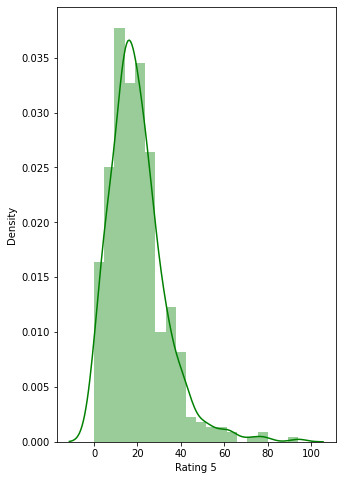

In [40]:
# Rating distribution

plt.subplots(1, figsize = (5,8))

sns.distplot(df[df['label']==1]['subject'].str.len(),bins=20,
             label='Rating 5 distribution',color='g')
plt.xlabel("Rating 5")
plt.show()

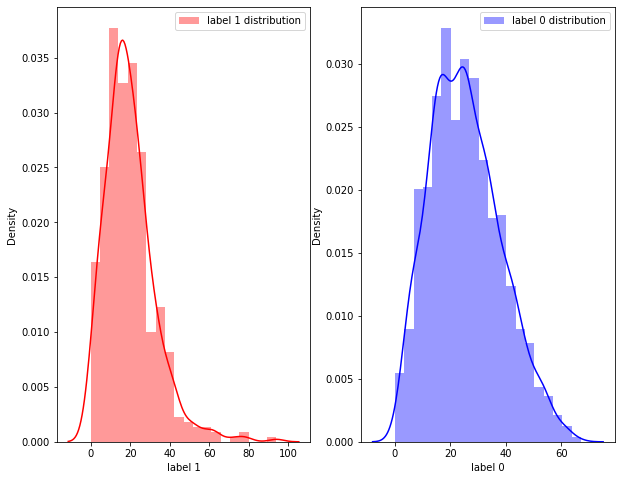

In [41]:
# subject distribution

f,ax = plt.subplots(1,2,figsize = (10,8))

sns.distplot(df[df['label']==1]['subject'].str.len(), bins=20, ax=ax[0],
             label='label 1 distribution',color='r')
ax[0].set_xlabel('label 1')
ax[0].legend()


sns.distplot(df[df['label']==0]['subject'].str.len(), bins=20, ax=ax[1],
             label='label 0 distribution', color = 'b')
ax[1].set_xlabel('label 0')
ax[1].legend()

plt.show()

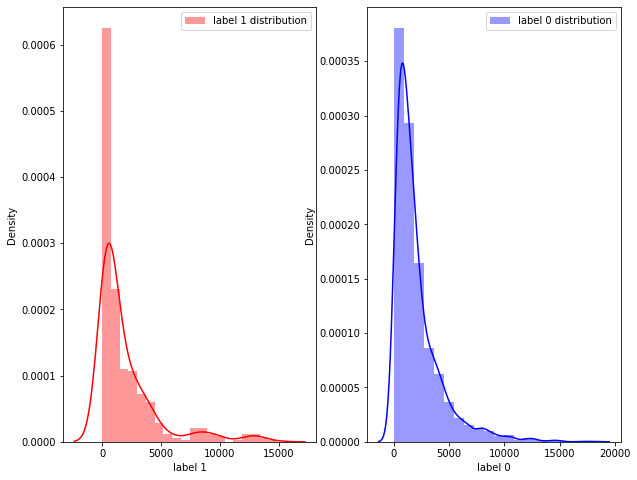

In [42]:
# message distribution

f,ax = plt.subplots(1,2,figsize = (10,8))

sns.distplot(df[df['label']==1]['message'].str.len(), bins=20, ax=ax[0],
             label='label 1 distribution',color='r')
ax[0].set_xlabel('label 1')
ax[0].legend()


sns.distplot(df[df['label']==0]['message'].str.len(), bins=20, ax=ax[1],
             label='label 0 distribution', color = 'b')
ax[1].set_xlabel('label 0')
ax[1].legend()

plt.show()

### 5. Data Encoding

In [43]:
y = df['label']
x = df.drop("label", axis = 1)

#### 5.1 For Subject

In [44]:
#converting text to numerical through n-gram tfidf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


word_vectorizer=TfidfVectorizer(sublinear_tf=True,
                              strip_accents='unicode',
                              analyzer='word',
                              token_pattern=r'\w{1,}',
                              stop_words='english',
                              ngram_range=(1,3))

word_vectorizer.fit(x['subject'])
subject_word_features=word_vectorizer.transform(x['subject'])

In [45]:
#vectorizing into character level
char_vectorizer=TfidfVectorizer(sublinear_tf=True,
                              strip_accents='unicode',
                              analyzer='char',
                              stop_words='english',
                              ngram_range=(2,6),
                               max_features=100000)

char_vectorizer.fit(x['subject'])
subject_char_features=char_vectorizer.transform(x['subject'])

In [49]:
subject_word_features.shape, subject_char_features.shape

((2876, 11014), (2876, 55381))

#### 5.2 For message

In [46]:
#converting text to numerical through n-gram tfidf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


word_vectorizer=TfidfVectorizer(sublinear_tf=True,
                              strip_accents='unicode',
                              analyzer='word',
                              token_pattern=r'\w{1,}',
                              stop_words='english',
                              ngram_range=(1,3))

word_vectorizer.fit(x['message'])
message_word_features=word_vectorizer.transform(x['message'])

In [47]:
#vectorizing into character level
char_vectorizer=TfidfVectorizer(sublinear_tf=True,
                              strip_accents='unicode',
                              analyzer='char',
                              stop_words='english',
                              ngram_range=(2,6),
                               max_features=100000000)

char_vectorizer.fit(x['message'])
message_char_features=char_vectorizer.transform(x['message'])

In [50]:
message_char_features.shape, message_word_features.shape

((2876, 950637), (2876, 1014470))

In [51]:
#clubbing the word and the character vector
from scipy.sparse import hstack
train_features = hstack([subject_word_features, subject_char_features, message_word_features, message_char_features])

### 6. Splitting data for model building

#### 6.1 Balancing Data

In [52]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=0)
oversample = SMOTE()
train_features_smote, y_smote = oversample.fit_resample(train_features, y)

print("Shape of y\n", (y.value_counts()))
print("Shape of y_smote\n", (y_smote.value_counts()))

Shape of y
 0    2408
1     468
Name: label, dtype: int64
Shape of y_smote
 0    2408
1    2408
Name: label, dtype: int64


In [53]:
train_features_smote.shape, y_smote.shape, df.shape

((4816, 2031502), (4816,), (2876, 3))

#### 6.2 Spliting data

In [56]:
from sklearn.model_selection import train_test_split
# making data into 3 splits so that we can get accurate accuracy of the model
train, test, train_output, test_output = train_test_split(train_features_smote, 
                                                         y_smote, 
                                                         test_size = 0.3,
                                                         stratify = y_smote,
                                                         random_state = 0)

train, cv, train_output, cv_output = train_test_split(train, 
                                                      train_output,
                                                     test_size = 0.3,
                                                     stratify = train_output,
                                                     random_state = 0)

In [57]:
train.shape, cv.shape, test.shape

((2359, 2031502), (1012, 2031502), (1445, 2031502))

In [58]:
train_output.shape, cv_output.shape, test_output.shape

((2359,), (1012,), (1445,))

### 7. Modelling

In [59]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB,BernoulliNB
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB,BernoulliNB
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, f1_score, classification_report, roc_curve, confusion_matrix

#### 7.1 Multinomial NB

In [61]:
alpha_range = [0.0001, 0.001, 0.01, 0.1, 1]
for i in alpha_range:
  nb_clf = MultinomialNB(alpha = i, fit_prior = True)
  nb_clf.fit(train, train_output )

  train_prob = nb_clf.predict_proba(train)[:,1]
  train_AUC = roc_auc_score(train_output, train_prob)
  print("for alpha = %f, train AUC = %f" % (i, train_AUC))

  
  cv_prob = nb_clf.predict_proba(cv)[:,1]
  cv_AUC = roc_auc_score(cv_output, cv_prob)
  print("for alpha = %f, CV AUC = %f" % (i, cv_AUC))

  train_scores = nb_clf.predict(train)
  train_f1 = f1_score(train_output, train_scores)
  print("for alpha = %f, train f1 score = %f" % (i, train_f1))

  cv_scores = nb_clf.predict(cv)
  cv_f1 = f1_score(cv_output, cv_scores)
  print("for alpha = %f, cv f1 score = %f" % (i, cv_f1))
  
  print("-"*50)

for alpha = 0.000100, train AUC = 1.000000
for alpha = 0.000100, CV AUC = 0.999996
for alpha = 0.000100, train f1 score = 1.000000
for alpha = 0.000100, cv f1 score = 0.999011
--------------------------------------------------
for alpha = 0.001000, train AUC = 1.000000
for alpha = 0.001000, CV AUC = 1.000000
for alpha = 0.001000, train f1 score = 1.000000
for alpha = 0.001000, cv f1 score = 0.999011
--------------------------------------------------
for alpha = 0.010000, train AUC = 1.000000
for alpha = 0.010000, CV AUC = 0.999980
for alpha = 0.010000, train f1 score = 1.000000
for alpha = 0.010000, cv f1 score = 0.999011
--------------------------------------------------
for alpha = 0.100000, train AUC = 1.000000
for alpha = 0.100000, CV AUC = 0.999965
for alpha = 0.100000, train f1 score = 0.999576
for alpha = 0.100000, cv f1 score = 0.997038
--------------------------------------------------
for alpha = 1.000000, train AUC = 0.999999
for alpha = 1.000000, CV AUC = 0.999852
for alpha

#### 7.2 Multinomial Algorithm on test dataset

#### We can observe that alpha = 0.001 having good AUC and f1 score with lower differences

In [73]:
nb_clf = MultinomialNB(alpha = 0.001, fit_prior = True)
nb_clf.fit(train, train_output )

  
test_prob = nb_clf.predict_proba(test)[:,1]
test_AUC = roc_auc_score(test_output, test_prob)
print("for alpha = %f, test AUC = %f" % (0.01, test_AUC))

test_scores = nb_clf.predict(test)
test_f1 = f1_score(test_output, test_scores)
print("for alpha = %f, test f1 score = %f" % (0.01, test_f1))



for alpha = 0.010000, test AUC = 0.999990
for alpha = 0.010000, test f1 score = 0.998615


In [74]:
print(classification_report(test_output, test_scores, target_names = ['Label 0', 'Label 1']))

              precision    recall  f1-score   support

     Label 0       1.00      1.00      1.00       723
     Label 1       1.00      1.00      1.00       722

    accuracy                           1.00      1445
   macro avg       1.00      1.00      1.00      1445
weighted avg       1.00      1.00      1.00      1445



#### 7.3 RandomForestClassifier

In [66]:
rnd = RandomForestClassifier()
rnd.fit(train, train_output )

train_prob = rnd.predict_proba(train)[:,1]
train_AUC = roc_auc_score(train_output, train_prob)
print("for alpha = %f, train AUC = %f" % (i, train_AUC))

  
cv_prob = rnd.predict_proba(cv)[:,1]
cv_AUC = roc_auc_score(cv_output, cv_prob)
print("for alpha = %f, CV AUC = %f" % (i, cv_AUC))

train_scores = rnd.predict(train)
train_f1 = f1_score(train_output, train_scores)
print("for alpha = %f, train f1 score = %f" % (i, train_f1))

cv_scores = rnd.predict(cv)
cv_f1 = f1_score(cv_output, cv_scores)
print("for alpha = %f, cv f1 score = %f" % (i, cv_f1))
  
print("-"*50)

for alpha = 0.000100, train AUC = 1.000000
for alpha = 0.000100, CV AUC = 0.999916
for alpha = 0.000100, train f1 score = 1.000000
for alpha = 0.000100, cv f1 score = 0.983936
--------------------------------------------------


#### 7.4 RandomForestClassifier Algorithm on test dataset

In [68]:
rnd = RandomForestClassifier()
rnd.fit(train, train_output )

  
test_prob = rnd.predict_proba(test)[:,1]
test_AUC = roc_auc_score(test_output, test_prob)
print("test AUC = %f" % ( test_AUC))

test_scores = rnd.predict(test)
test_f1 = f1_score(test_output, test_scores)
print("test f1 score = %f" % (test_f1))



test AUC = 0.999889
test f1 score = 0.981664


In [69]:
print(classification_report(test_output, test_scores, target_names = ['Label 0', 'Label 1']))

              precision    recall  f1-score   support

     Label 0       0.97      1.00      0.98       723
     Label 1       1.00      0.96      0.98       722

    accuracy                           0.98      1445
   macro avg       0.98      0.98      0.98      1445
weighted avg       0.98      0.98      0.98      1445



#### 7.5 Logistics Regression

In [71]:
c_range = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
for i in c_range:
  logistic_clf = LogisticRegression(C = i, max_iter =300)
  logistic_clf.fit(train, train_output )

  train_prob = logistic_clf.predict_proba(train)[:,1]
  train_AUC = roc_auc_score(train_output, train_prob)
  print("for alpha = %f, train AUC = %f" % (i, train_AUC))

  
  cv_prob = logistic_clf.predict_proba(cv)[:,1]
  cv_AUC = roc_auc_score(cv_output, cv_prob)
  print("for alpha = %f, CV AUC = %f" % (i, cv_AUC))

  train_scores = logistic_clf.predict(train)
  train_f1 = f1_score(train_output, train_scores)
  print("for alpha = %f, train f1 score = %f" % (i, train_f1))

  cv_scores = logistic_clf.predict(cv)
  cv_f1 = f1_score(cv_output, cv_scores)
  print("for alpha = %f, cv f1 score = %f" % (i, cv_f1))
  
  print("-"*50)

for alpha = 0.000100, train AUC = 0.999746
for alpha = 0.000100, CV AUC = 0.999211
for alpha = 0.000100, train f1 score = 0.984536
for alpha = 0.000100, cv f1 score = 0.969450
--------------------------------------------------
for alpha = 0.001000, train AUC = 0.999749
for alpha = 0.001000, CV AUC = 0.999207
for alpha = 0.001000, train f1 score = 0.949711
for alpha = 0.001000, cv f1 score = 0.917647
--------------------------------------------------
for alpha = 0.010000, train AUC = 0.999814
for alpha = 0.010000, CV AUC = 0.999309
for alpha = 0.010000, train f1 score = 0.963126
for alpha = 0.010000, cv f1 score = 0.941423
--------------------------------------------------
for alpha = 0.100000, train AUC = 0.999995
for alpha = 0.100000, CV AUC = 0.999727
for alpha = 0.100000, train f1 score = 0.997877
for alpha = 0.100000, cv f1 score = 0.983936
--------------------------------------------------
for alpha = 1.000000, train AUC = 1.000000
for alpha = 1.000000, CV AUC = 0.999883
for alpha

### 7.6 Observation

### We observe that Multinomial NB works good from among models hence we are finalizing it for final model conclusion

In [75]:
nb_clf = MultinomialNB(alpha = 0.001, fit_prior = True)
nb_clf.fit(train, train_output )

  
test_prob = nb_clf.predict_proba(test)[:,1]
test_AUC = roc_auc_score(test_output, test_prob)
print("for alpha = %f, test AUC = %f" % (0.01, test_AUC))

test_scores = nb_clf.predict(test)
test_f1 = f1_score(test_output, test_scores)
print("for alpha = %f, test f1 score = %f" % (0.01, test_f1))



for alpha = 0.010000, test AUC = 0.999990
for alpha = 0.010000, test f1 score = 0.998615


### Deploy the model

In [77]:
import pickle
filename = 'email_spam.pkl'                 # model name 
pickle.dump(nb_clf, open(filename, 'wb'))

### Loading Model

In [80]:
load_model =  pickle.load(open('email_spam.pkl', 'rb'))    # loading deployed model
result = load_model.score(test, test_output)                            
print(result) 

0.9986159169550173


In [81]:
original = np.array(test_output)
predicted = np.array(load_model.predict(test))  
# convert columns in to np.array 

In [82]:
conclusion = pd.DataFrame({'Original ': original, 'Predicted': predicted}, index = range(len(original)))
# Dataframe creation

In [83]:
pd.set_option('display.max_rows', None)  # To maximize the rows
conclusion.sample(5)

,Original,Predicted
792,1,1
989,1,1
563,0,0
294,0,0
506,0,0
